In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
#Lay du lieu tu github
url = 'https://raw.githubusercontent.com/PCDattt/Raisin-Classification/main/Raisin_Dataset.csv'
data = pd.read_csv(url)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
data.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [ ]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


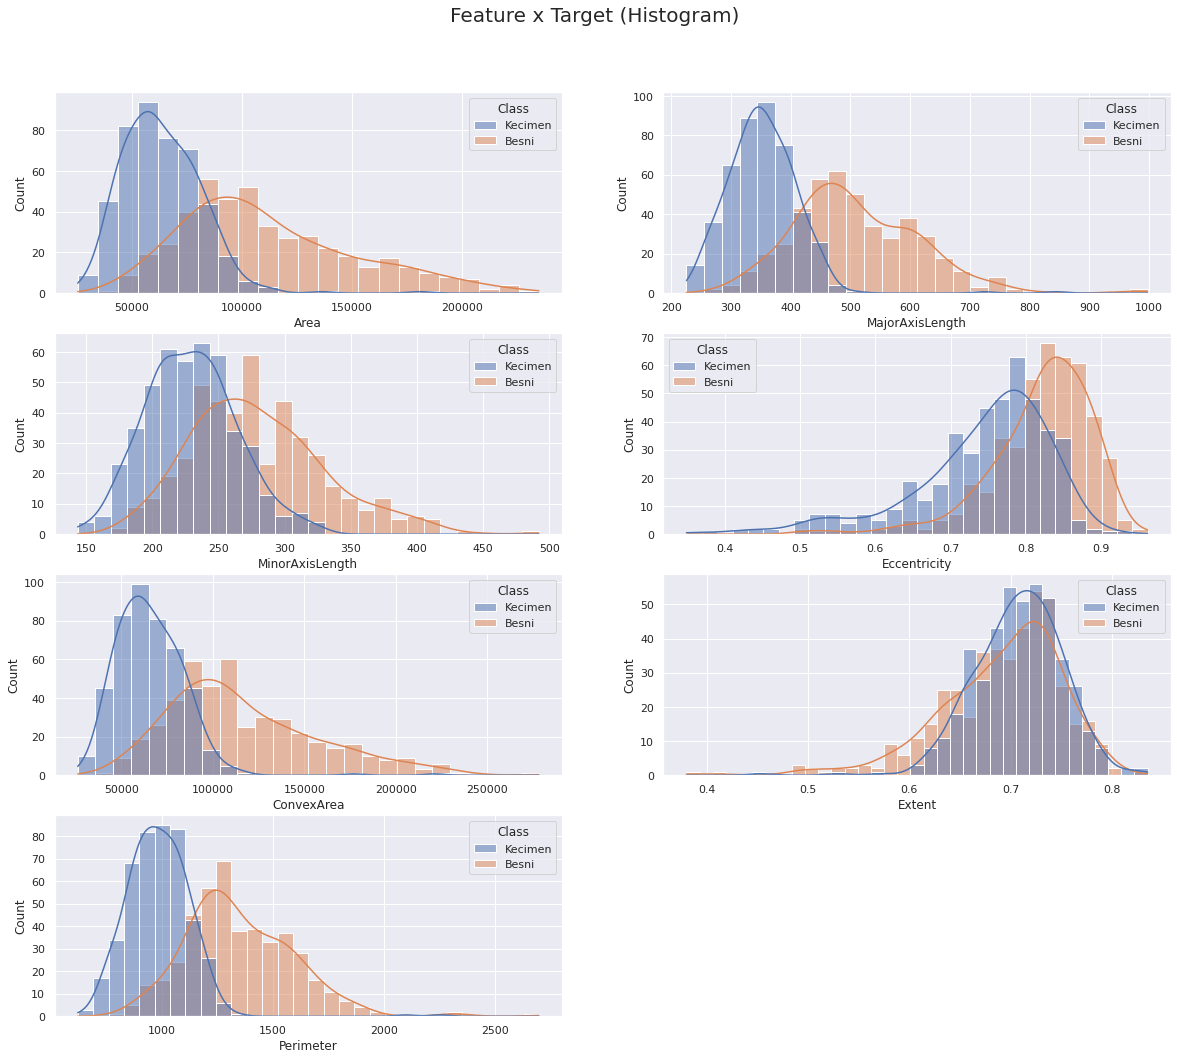

In [ ]:
#Ve histogram cho cac feature
area = plt.figure(figsize=(20,17))

g1 = area.add_subplot(4,2,1)
g2 = area.add_subplot(4,2,2)
g3 = area.add_subplot(4,2,3)
g4 = area.add_subplot(4,2,4)
g5 = area.add_subplot(4,2,5)
g6 = area.add_subplot(4,2,6)
g7 = area.add_subplot(4,2,7)

area.suptitle('Feature x Target (Histogram)', fontsize = 20, y = 0.95)
sns.histplot(data = data, x = 'Area', hue = 'Class', ax=g1, kde=True)
sns.histplot(data = data, x = 'MajorAxisLength', hue = 'Class', ax=g2, kde=True)
sns.histplot(data = data, x = 'MinorAxisLength', hue = 'Class', ax=g3, kde=True)
sns.histplot(data = data, x = 'Eccentricity', hue = 'Class', ax=g4, kde=True)
sns.histplot(data = data, x = 'ConvexArea', hue = 'Class', ax=g5, kde=True)
sns.histplot(data = data, x = 'Extent', hue = 'Class', ax=g6, kde=True)
sns.histplot(data = data, x = 'Perimeter', hue = 'Class', ax=g7, kde=True)

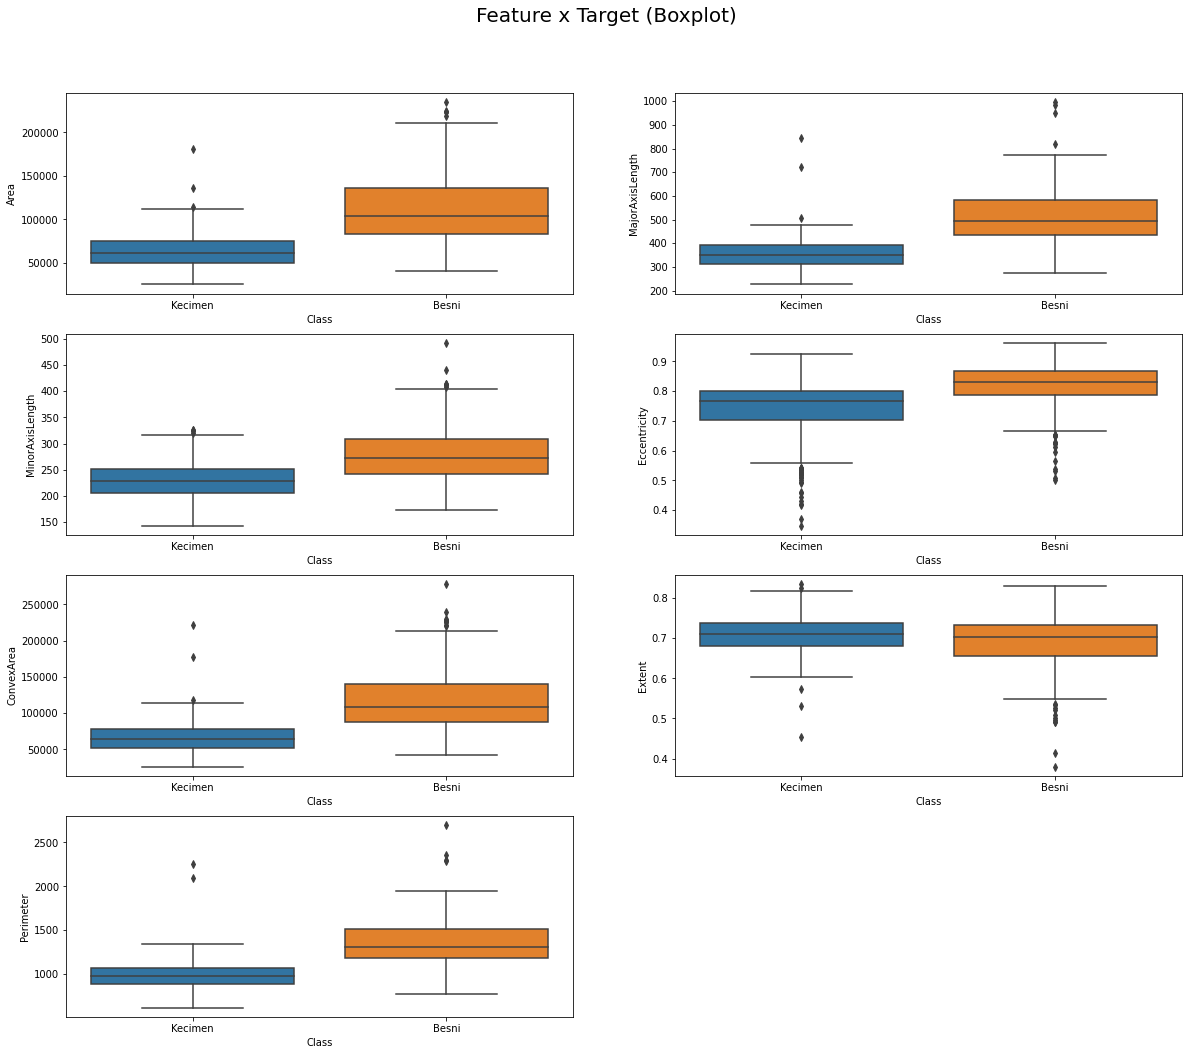

In [ ]:
#Ve do thi boxplot cho cac feature
area = plt.figure(figsize=(20,17))

g1 = area.add_subplot(4,2,1)
g2 = area.add_subplot(4,2,2)
g3 = area.add_subplot(4,2,3)
g4 = area.add_subplot(4,2,4)
g5 = area.add_subplot(4,2,5)
g6 = area.add_subplot(4,2,6)
g7 = area.add_subplot(4,2,7)

area.suptitle('Feature x Target (Boxplot)', fontsize = 20, y = 0.95)
sns.boxplot(data = data, x = 'Class', y = 'Area', ax=g1)
sns.boxplot(data = data, x = 'Class', y = 'MajorAxisLength', ax=g2)
sns.boxplot(data = data, x = 'Class', y = 'MinorAxisLength', ax=g3)
sns.boxplot(data = data, x = 'Class', y = 'Eccentricity', ax=g4)
sns.boxplot(data = data, x = 'Class', y = 'ConvexArea', ax=g5)
sns.boxplot(data = data, x = 'Class', y = 'Extent', ax=g6)
sns.boxplot(data = data, x = 'Class', y = 'Perimeter', ax=g7)

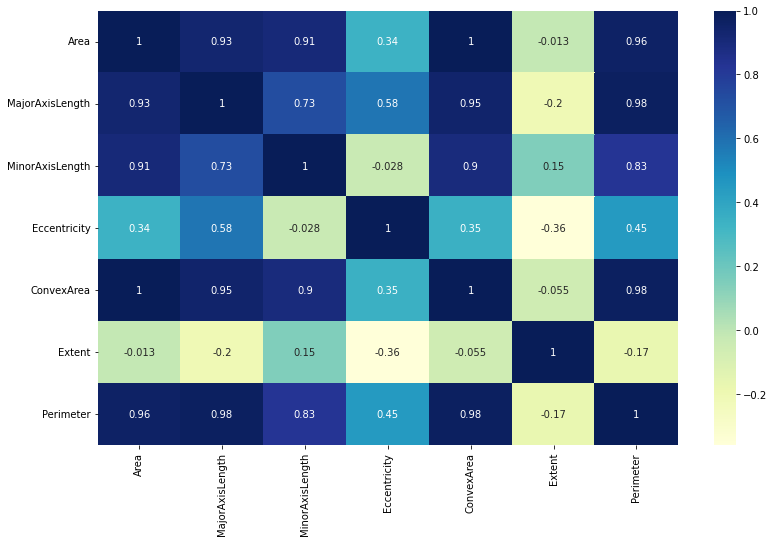

In [ ]:
area = plt.figure(figsize=(13,8))
ax = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [48]:
#Cac ham de tinh do chinh xac va chay KNN
def evaluate_model(y_test, y_pred):


    # Tinh accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1}

def cal_mean(x, y, n):
    acc_sum = 0
    pre_sum = 0
    re_sum = 0
    f1_sum = 0
    for i in range(n):
          x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2);
          clf = KNeighborsClassifier(n_neighbors = 29);
          clf.fit(x_train, y_train);
          y_pred = clf.predict(x_test);
          eval = evaluate_model(y_test, y_pred);
          acc_sum = acc_sum + eval['acc'];
          pre_sum = pre_sum + eval['prec'];
          re_sum = re_sum + eval['rec'];
          f1_sum = f1_sum + eval['f1'];
    print('Accuracy:', (acc_sum / n * 100).round(2), '%')
    print('Precision:', (pre_sum / n * 100).round(2), '%')
    print('Recall:', (re_sum / n * 100).round(2), '%')
    print('F1 Score:', (f1_sum / n * 100).round(2), '%')

In [49]:
#Chuyen hoa va tach class 
data['Class'] = OrdinalEncoder().fit_transform(data[['Class']])
x = data.drop("Class", axis = 1)
y = data.Class

In [50]:
#Chay KNN khi chua normalized data
cal_mean(x, y, 5000)

Accuracy: 82.0 %
Precision: 78.97 %
Recall: 87.28 %
F1 Score: 82.82 %


Công thức normalize:

X_std = (X - X.min) / (X.max - X.min)

X_scaled = X_std * (max - min) + min

In [54]:
#Normalized data
for i in x.columns:
        x[i]=preprocessing.MinMaxScaler().fit_transform(x[[i]])

x.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [ ]:
#Chay KNN sau khi normalized data
cal_mean(x,y,5000)

Accuracy: 86.24 %
Precision: 83.34 %
Recall: 90.64 %
F1 Score: 86.78 %


In [55]:
#Kiem tra 4 feature co do phan loai cao 
data_new = SelectKBest(chi2, k=4).fit_transform(x,y)
data_new = pd.DataFrame(data_new)
data_new.head()

,0,1,2,3
0,0.296370,0.280714,0.255504,0.271791
1,0.237427,0.234638,0.208864,0.241842
2,0.312263,0.280741,0.268084,0.283594
3,0.097973,0.078935,0.084089,0.108284
4,0.257660,0.164011,0.219472,0.218493


In [56]:
#Tach 4 feature co do phan loai cao
x_train2 = x.loc[:,['Area','MajorAxisLength', 'ConvexArea', 'Perimeter' ]]
x_train2

,Area,MajorAxisLength,ConvexArea,Perimeter
0,0.296370,0.280714,0.255504,0.271791
1,0.237427,0.234638,0.208864,0.241842
2,0.312263,0.280741,0.268084,0.283594
3,0.097973,0.078935,0.084089,0.108284
4,0.257660,0.164011,0.219472,0.218493
...,...,...,...,...
895,0.275975,0.264945,0.236831,0.245347
896,0.295540,0.278757,0.256905,0.286325
897,0.354240,0.267056,0.317858,0.324126
898,0.324983,0.324902,0.283698,0.307635


In [57]:
#Chay KNN voi 4 feature da tach
cal_mean(x_train2, y, 5000)

Accuracy: 85.52 %
Precision: 82.8 %
Recall: 89.78 %
F1 Score: 86.08 %


Maximum accuracy:- 0.8388888888888889 at K = 83


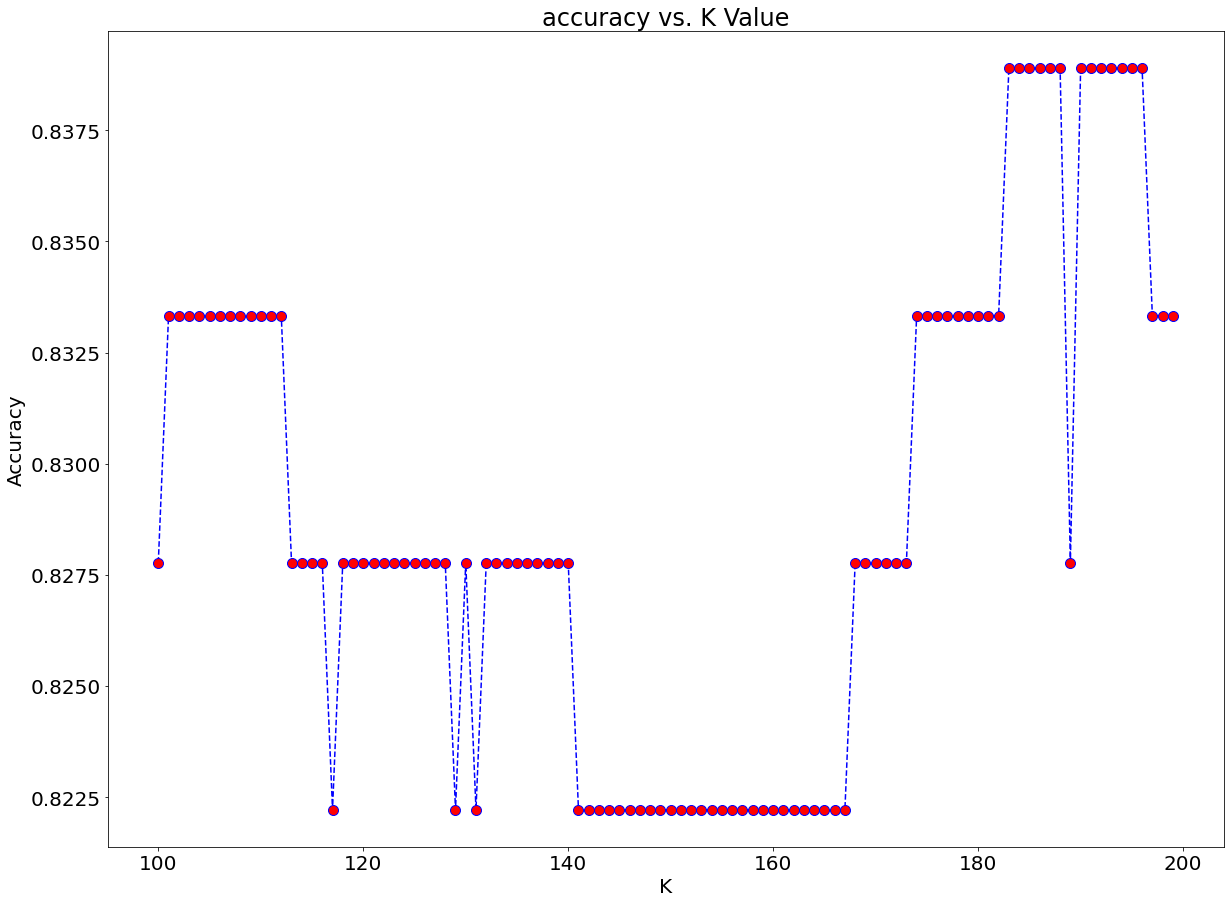

In [46]:
#Kiem tra nhieu K
acc = []
from sklearn import metrics
import matplotlib.pyplot as plt
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2);
for i in range(100,200):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(20,15))
plt.plot(range(100,200),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.rcParams['font.size'] = 20
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))